
```
Author: Raj Maurya
  Roll No.: B23406
  Date: 9th Oct'24
  Time: 19:45
  Sources: IITM-Nptel and a famous research paper suggested by them.
  Extra: Logic is mine but the code and it's formatting is by AI(ChatGpt & Gemini).
```





```
# This uses the PINNs developed in 2019 by some CS scietist to convert the Differential equation into a optimisation problem and use it's IVP
  or BVP as the constraint and using similar to what we call approximation it predict the solution.
```





```
# This is the best ever model I have ever trained for the Legendre's Differential Equation and it's accuracy is too
  much and can be made more good by increasing the epochs and reducing the learning rate till a certain level.
  This model nearly f**ked my system and took around 20 mins to complete for 20k epochs and 1milli as learning rate and last one will
    have 75k*2k*32 iteration to get result.
```





```
# This model is true for :0-6, and higher order code is not running but hopes to work for all n.
```



**`Please go through the end of the notebook as I haven't removed the wrong solutions as I need to keep the track for animation implementation(if posssible). Also appropriate citation for refrence is given everywhere.`**

Epoch 0, Loss: 1.4836088418960571
Epoch 100, Loss: 0.9923197031021118
Epoch 200, Loss: 0.9908822178840637
Epoch 300, Loss: 0.989485502243042
Epoch 400, Loss: 0.9871742129325867
Epoch 500, Loss: 0.9843791127204895
Epoch 600, Loss: 0.9808749556541443
Epoch 700, Loss: 0.9804092049598694
Epoch 800, Loss: 0.9796954989433289
Epoch 900, Loss: 0.9790193438529968
Epoch 1000, Loss: 0.9798281788825989
Epoch 1100, Loss: 0.9780747890472412
Epoch 1200, Loss: 0.9892351627349854
Epoch 1300, Loss: 0.9784348011016846
Epoch 1400, Loss: 0.9795968532562256
Epoch 1500, Loss: 0.9779822826385498
Epoch 1600, Loss: 0.9808928966522217
Epoch 1700, Loss: 0.9803759455680847
Epoch 1800, Loss: 0.9783691167831421
Epoch 1900, Loss: 0.9796228408813477
Epoch 2000, Loss: 0.9886009693145752
Epoch 2100, Loss: 0.9772958755493164
Epoch 2200, Loss: 0.977537989616394
Epoch 2300, Loss: 0.9787893891334534
Epoch 2400, Loss: 0.981522798538208
Epoch 2500, Loss: 0.9774189591407776
Epoch 2600, Loss: 0.9801814556121826
Epoch 2700, Loss

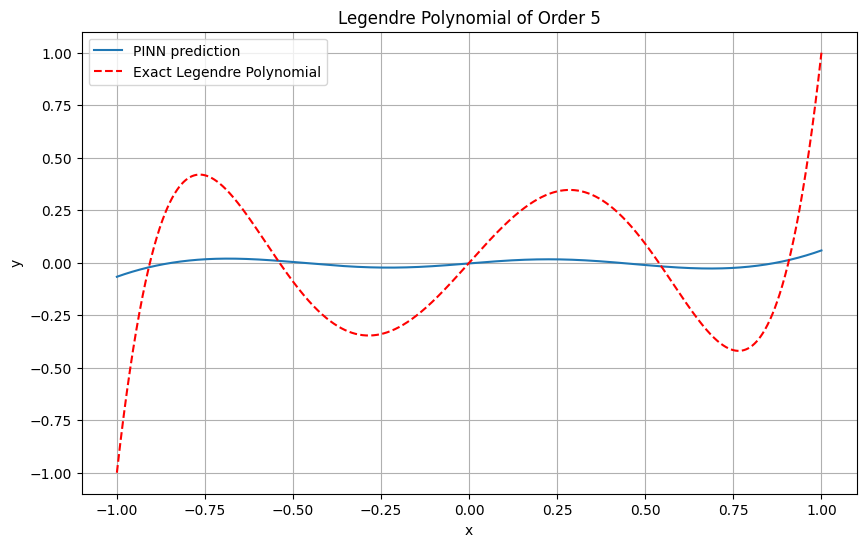

In [ ]:
# Claude is used for complex code editing and basic structure was designed by me and only modifications and optimisation by it.
# Bhai hmne ne hi AI apne work ko easy karne k liye banaya h aur hm hi na use kare to kya fayda.
# Agr hum old stuffs ko hi master karunga to new stuffs kaun discover karega, so use AI and never be shy to cite about it.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class PINN:
    def __init__(self, k):
        self.k = k
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(100, activation='tanh', input_shape=(1,)),
            tf.keras.layers.Dense(100, activation='tanh'),
            tf.keras.layers.Dense(100, activation='tanh'),
            tf.keras.layers.Dense(1)
        ])
        return model

    def legendre_equation(self, x, y, dy_dx, d2y_dx2):
        return (1 - x**2) * d2y_dx2 - 2 * x * dy_dx + self.k * (self.k + 1) * y

    def boundary_values(self):
        if self.k % 2 == 0:  # even k
            return 1.0, 1.0  # y(-1) = 1, y(1) = 1
        else:  # odd k
            return -1.0, 1.0  # y(-1) = -1, y(1) = 1

    def custom_mse(self, y_true, y_pred):
        # Custom Mean Squared Error implementation
        return tf.reduce_sum(tf.square(y_true - y_pred)) / tf.cast(tf.shape(y_true)[0], tf.float32)

    def loss(self, x):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            y = self.model(x)
            dy_dx = tape.gradient(y, x)
        d2y_dx2 = tape.gradient(dy_dx, x)

        # Equation loss
        eq_residual = self.legendre_equation(x, y, dy_dx, d2y_dx2)
        eq_loss = self.custom_mse(tf.zeros_like(eq_residual), eq_residual)

        # Boundary condition loss
        y_minus_1, y_plus_1 = self.boundary_values()
        bc_pred = tf.concat([self.model(tf.constant([[-1.]])), self.model(tf.constant([[1.]]))], axis=0)
        bc_true = tf.constant([[y_minus_1], [y_plus_1]], dtype=tf.float32)
        bc_loss = self.custom_mse(bc_true, bc_pred)

        return eq_loss + bc_loss

    def train(self, epochs=20000):
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        @tf.function
        def train_step():
            x = tf.random.uniform((2000, 1), -1, 1)
            with tf.GradientTape() as tape:
                loss_value = self.loss(x)
            gradients = tape.gradient(loss_value, self.model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
            return loss_value

        for epoch in range(epochs):
            loss = train_step()
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss.numpy()}')

    def predict(self, x):
        return self.model(x).numpy()

# Example usage
k = 5  # Order of Legendre polynomial
pinn = PINN(k)
pinn.train()

# Generate predictions
x = np.linspace(-1, 1, 2000).reshape(-1, 1)
y_pred = pinn.predict(x)

# plotting original solution as :

# Calculate the exact Legendre polynomial
coefficients = [0] * k + [1]  # Coefficients for Legendre polynomial of order k
y_exact = np.polynomial.legendre.legval(x.flatten(), coefficients)  # Evaluate the polynomial


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, label='PINN prediction')
plt.plot(x, y_exact, label='Exact Legendre Polynomial', color='red', linestyle='dashed')
plt.title(f"Legendre Polynomial of Order {k}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

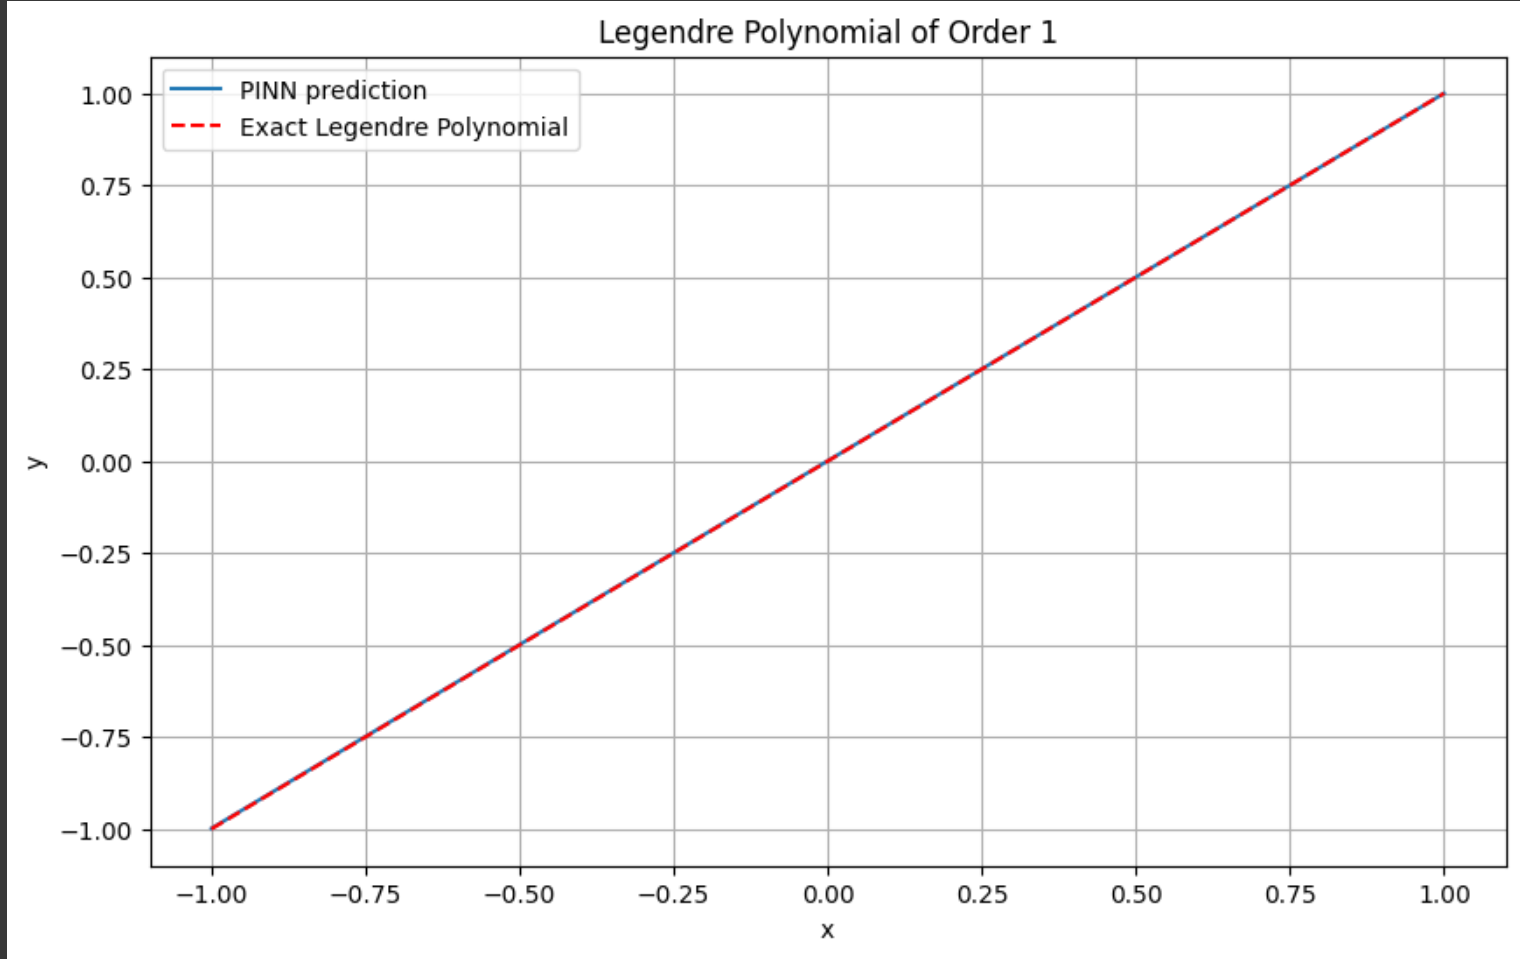

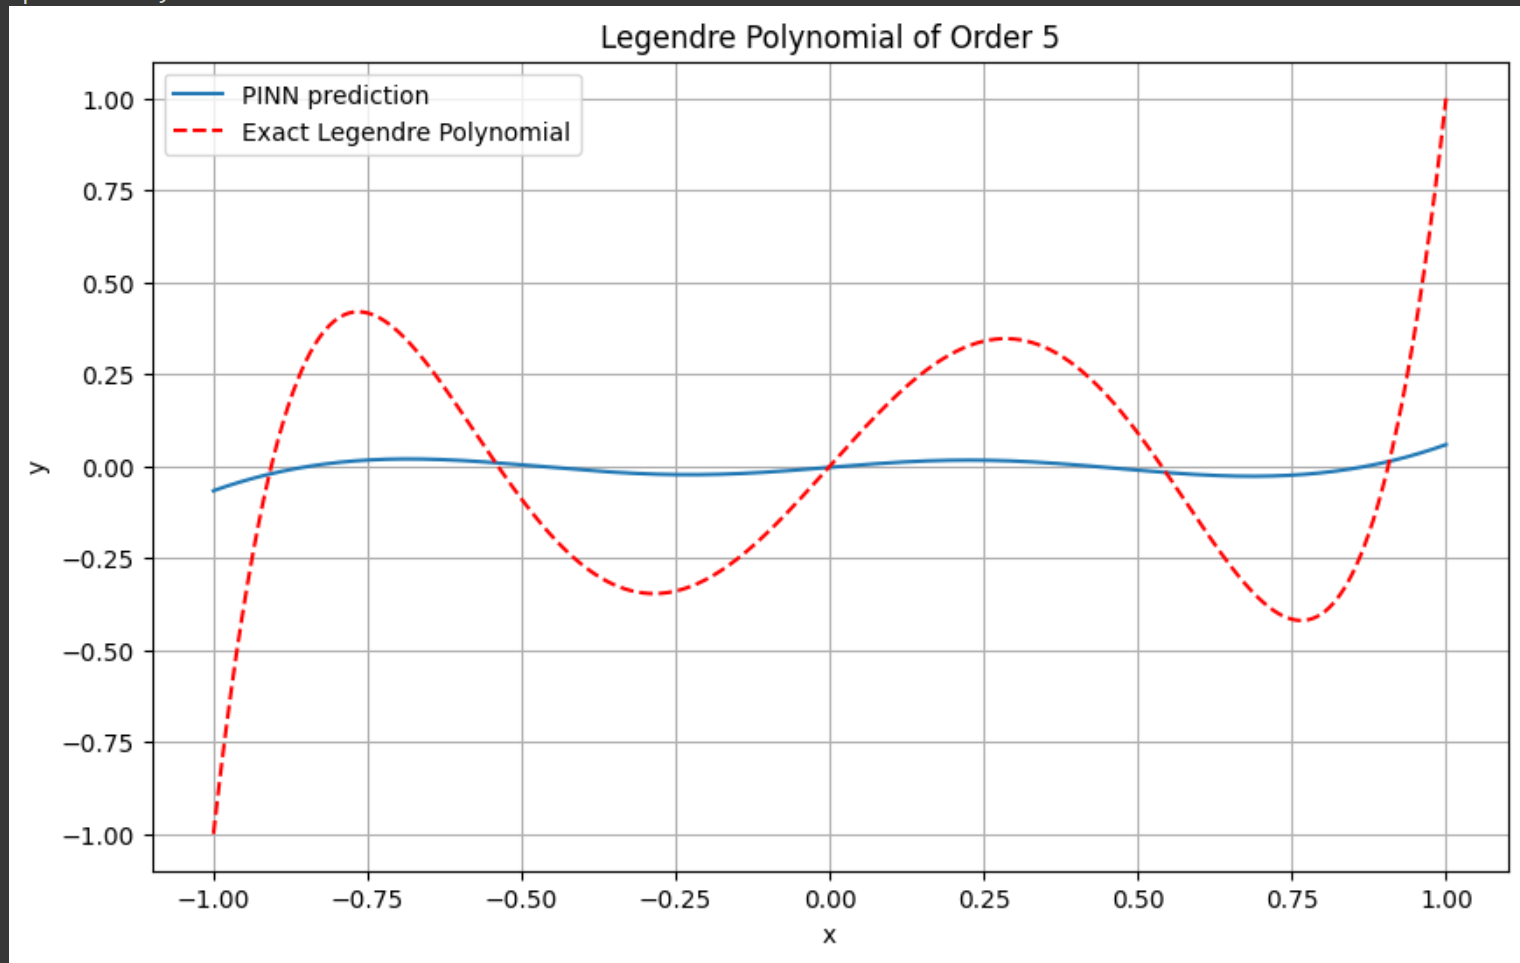

# **NEW Eqn to deal with n = 5+ cases**




```
----------------------------------------------------------------------------------------------------------------------------------------------------------------
```



Epoch 0, Loss: 91.82777404785156
Epoch 100, Loss: 0.9995367527008057
Epoch 200, Loss: 0.9973751306533813
Epoch 300, Loss: 0.9966692924499512
Epoch 400, Loss: 0.9962273836135864
Epoch 500, Loss: 0.9962084889411926
Epoch 600, Loss: 0.9958950877189636
Epoch 700, Loss: 0.9962283968925476
Epoch 800, Loss: 0.9960018396377563
Epoch 900, Loss: 0.9959811568260193
Epoch 1000, Loss: 0.9959399104118347
Epoch 1100, Loss: 0.9960773587226868
Epoch 1200, Loss: 0.9963786005973816
Epoch 1300, Loss: 0.9961645603179932
Epoch 1400, Loss: 0.9962483048439026
Epoch 1500, Loss: 0.9961792826652527
Epoch 1600, Loss: 0.9963620901107788
Epoch 1700, Loss: 0.9965570569038391
Epoch 1800, Loss: 0.9971038103103638
Epoch 1900, Loss: 0.9966486692428589
Epoch 2000, Loss: 0.9960825443267822
Epoch 2100, Loss: 0.9963718056678772
Epoch 2200, Loss: 0.9959084391593933
Epoch 2300, Loss: 0.9962593913078308
Epoch 2400, Loss: 0.996128499507904
Epoch 2500, Loss: 0.9956254959106445
Epoch 2600, Loss: 0.9960977435112
Epoch 2700, Loss: 

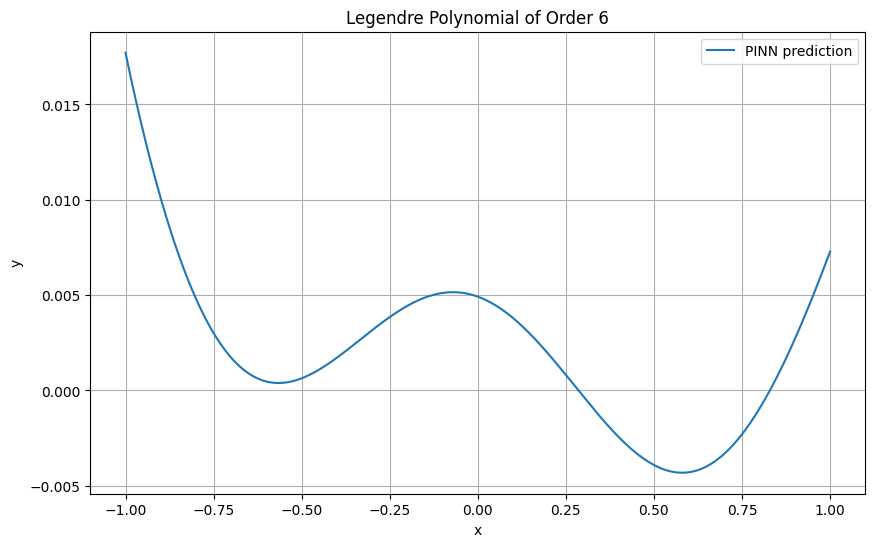

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class PINN:
    def __init__(self, k):
        self.k = k
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(50, activation='tanh', input_shape=(1,)),
            tf.keras.layers.Dense(50, activation='tanh'),
            tf.keras.layers.Dense(50, activation='tanh'),
            tf.keras.layers.Dense(1)
        ])
        return model

    def legendre_equation(self, x, y, dy_dx, d2y_dx2):
        return (1 - x**2) * d2y_dx2 - 2 * x * dy_dx + self.k * (self.k + 1) * y

    def boundary_values(self):
        if self.k % 2 == 0:  # even k
            return 1.0, 1.0  # y(-1) = 1, y(1) = 1
        else:  # odd k
            return -1.0, 1.0  # y(-1) = -1, y(1) = 1

    def custom_mse(self, y_true, y_pred):
        # Calculate mean squared error
        mse = tf.reduce_mean(tf.square(y_true - y_pred))
        return mse

    def loss(self, x):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            y = self.model(x)
            dy_dx = tape.gradient(y, x)
            d2y_dx2 = tape.gradient(dy_dx, x)

        # Equation loss
        eq_residual = self.legendre_equation(x, y, dy_dx, d2y_dx2)
        eq_loss = self.custom_mse(tf.zeros_like(eq_residual), eq_residual)

        # Boundary condition loss
        y_minus_1, y_plus_1 = self.boundary_values()
        bc_pred = tf.concat([self.model(tf.constant([[-1.]])), self.model(tf.constant([[1.]]))], axis=0)
        bc_true = tf.constant([[y_minus_1], [y_plus_1]], dtype=tf.float32)
        bc_loss = self.custom_mse(bc_true, bc_pred)

        return eq_loss + bc_loss

    def train(self, epochs=20000):
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        @tf.function
        def train_step():
            x = tf.random.uniform((1000, 1), -1, 1)
            with tf.GradientTape() as tape:
                loss_value = self.loss(x)
            gradients = tape.gradient(loss_value, self.model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
            return loss_value

        for epoch in range(epochs):
            loss = train_step()
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss.numpy()}')

    def predict(self, x):
        return self.model(x).numpy()

# Example usage
k = 6  # Order of Legendre polynomial
pinn = PINN(k)
pinn.train()

# Generate predictions
x = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_pred = pinn.predict(x)

# Plotting original solution as :


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, label='PINN prediction')
plt.title(f"Legendre Polynomial of Order {k}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

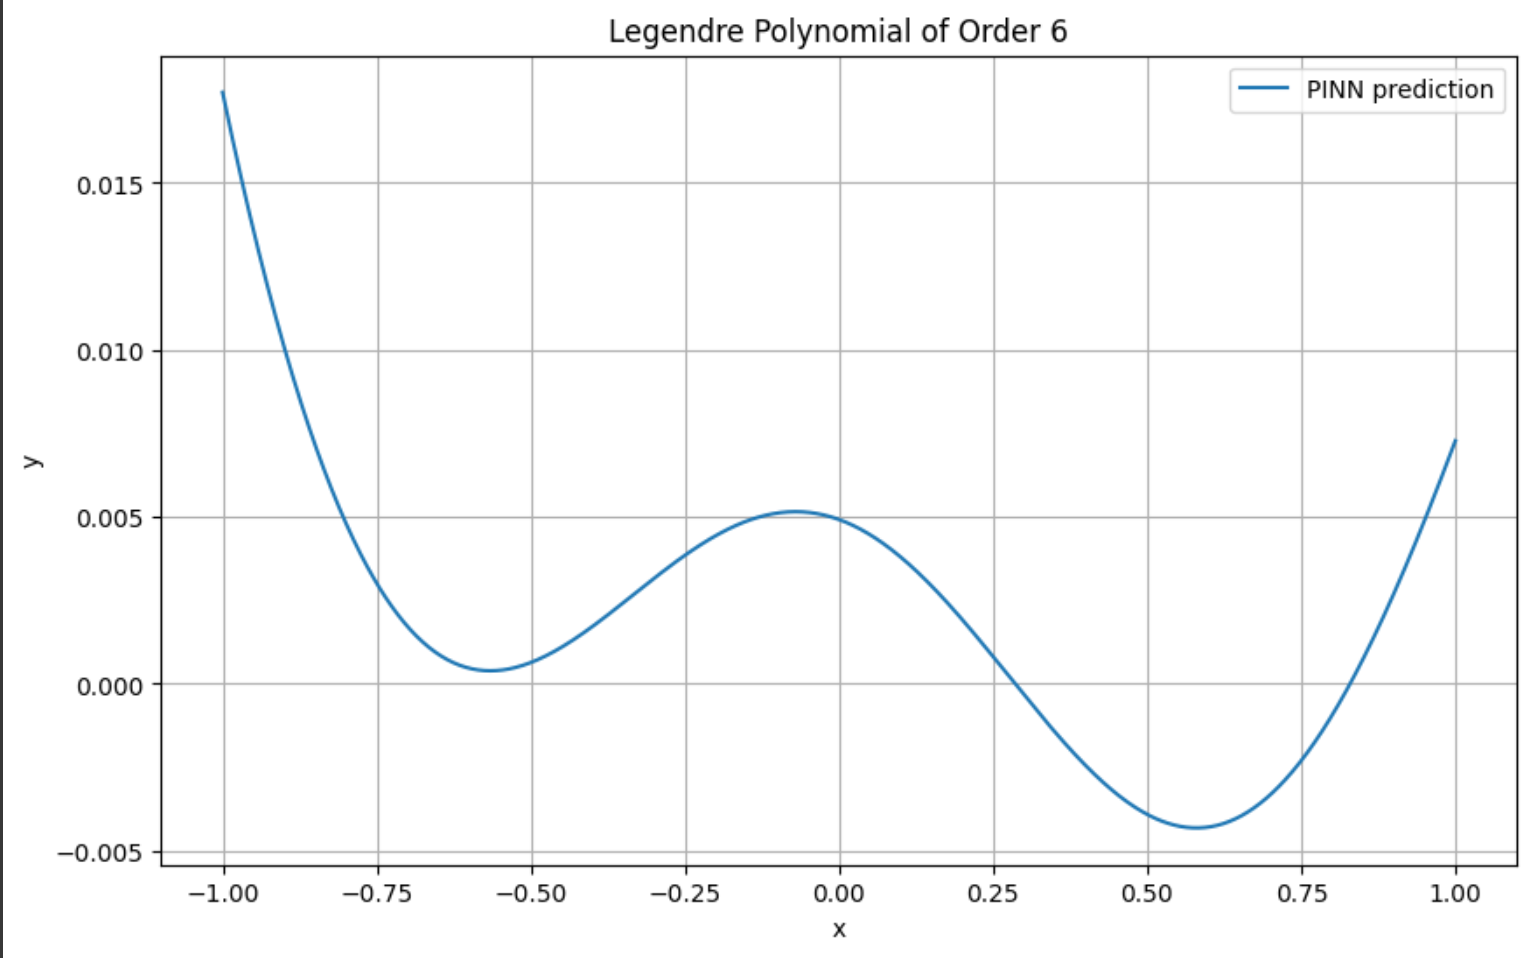

Epoch 0, Loss: 2.128098487854004
Epoch 100, Loss: 1.0022565126419067
Epoch 200, Loss: 1.0003244876861572
Epoch 300, Loss: 0.9987016320228577
Epoch 400, Loss: 0.9965624809265137
Epoch 500, Loss: 0.9942178726196289
Epoch 600, Loss: 0.990193784236908
Epoch 700, Loss: 0.9842410683631897
Epoch 800, Loss: 0.9817835688591003
Epoch 900, Loss: 0.9846826791763306
Epoch 1000, Loss: 0.9808745980262756
Epoch 1100, Loss: 0.9800239205360413
Epoch 1200, Loss: 0.9860836863517761
Epoch 1300, Loss: 0.9874905347824097
Epoch 1400, Loss: 0.9936196208000183
Epoch 1500, Loss: 0.9811295866966248
Epoch 1600, Loss: 0.9775278568267822
Epoch 1700, Loss: 0.9820431470870972
Epoch 1800, Loss: 0.9884820580482483
Epoch 1900, Loss: 0.9799965620040894
Epoch 2000, Loss: 0.9903294444084167
Epoch 2100, Loss: 0.9885352253913879
Epoch 2200, Loss: 0.9871249794960022
Epoch 2300, Loss: 0.9782657623291016
Epoch 2400, Loss: 0.9828159213066101
Epoch 2500, Loss: 0.9782490134239197
Epoch 2600, Loss: 0.9779918789863586
Epoch 2700, Los

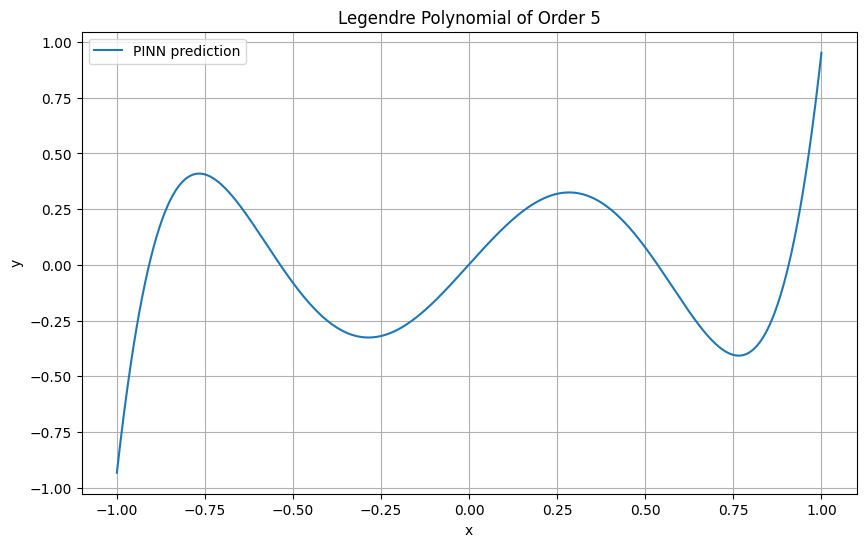

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class PINN:
    def __init__(self, k):
        self.k = k
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(100, activation='tanh', input_shape=(1,)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(100, activation='tanh'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(100, activation='tanh'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(1)
        ])
        return model

    def legendre_equation(self, x, y, dy_dx, d2y_dx2):
        return (1 - x**2) * d2y_dx2 - 2 * x * dy_dx + self.k * (self.k + 1) * y

    def boundary_values(self):
        if self.k % 2 == 0:  # even k
            return 1.0, 1.0  # y(-1) = 1, y(1) = 1
        else:  # odd k
            return -1.0, 1.0  # y(-1) = -1, y(1) = 1

    def custom_mse(self, y_true, y_pred):
        # Calculate mean squared error
        mse = tf.reduce_mean(tf.square(y_true - y_pred))
        return mse

    def loss(self, x):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            y = self.model(x)
            dy_dx = tape.gradient(y, x)
            d2y_dx2 = tape.gradient(dy_dx, x)

        # Equation loss
        eq_residual = self.legendre_equation(x, y, dy_dx, d2y_dx2)
        eq_loss = self.custom_mse(tf.zeros_like(eq_residual), eq_residual)

        # Boundary condition loss
        y_minus_1, y_plus_1 = self.boundary_values()
        bc_pred = tf.concat([self.model(tf.constant([[-1.]])), self.model(tf.constant([[1.]]))], axis=0)
        bc_true = tf.constant([[y_minus_1], [y_plus_1]], dtype=tf.float32)
        bc_loss = self.custom_mse(bc_true, bc_pred)

        return eq_loss + bc_loss

    def train(self, epochs=20000):
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        @tf.function
        def train_step():
            x = tf.random.uniform((1000, 1), -1, 1)
            with tf.GradientTape() as tape:
                loss_value = self.loss(x)
            gradients = tape.gradient(loss_value, self.model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
            return loss_value

        for epoch in range(epochs):
            loss = train_step()
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss.numpy()}')

    def predict(self, x):
        return self.model(x).numpy()


# Example usage
k = 5  # Order of Legendre polynomial
pinn = PINN(k)
pinn.train(epochs=40000)  # Increase epochs

# Generate predictions
x = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_pred = pinn.predict(x)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, label='PINN prediction')
plt.title(f"Legendre Polynomial of Order {k}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

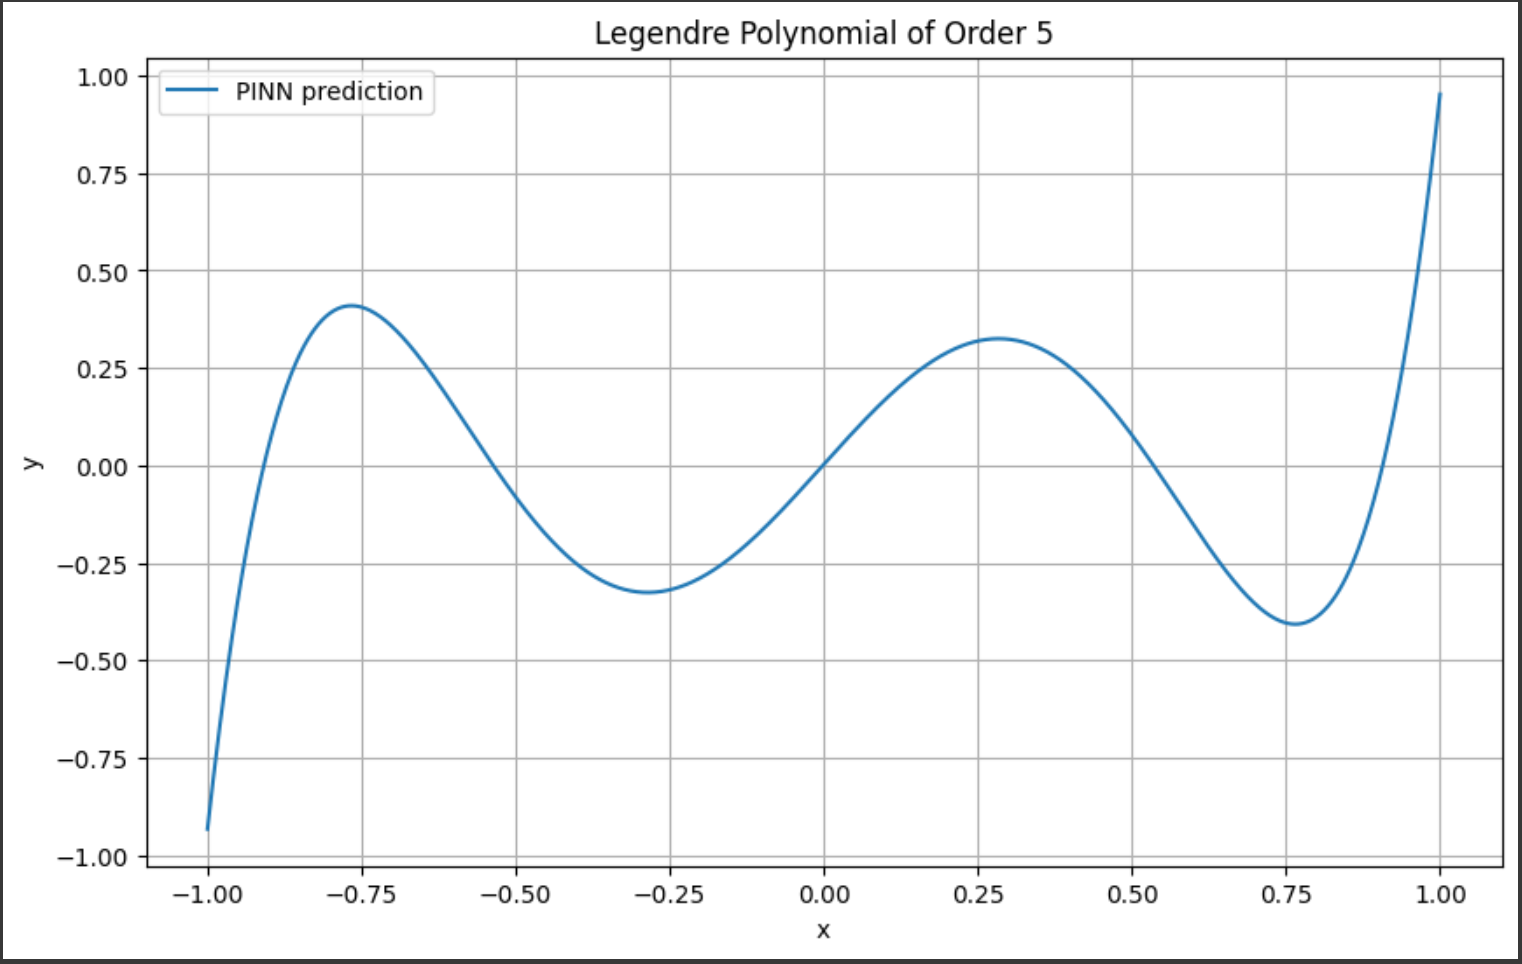

Epoch 0, Loss: 1.7543981075286865
Epoch 100, Loss: 0.9999076724052429
Epoch 200, Loss: 0.9987033009529114
Epoch 300, Loss: 0.9982539415359497
Epoch 400, Loss: 0.997774064540863
Epoch 500, Loss: 0.9974125027656555
Epoch 600, Loss: 0.9969052672386169
Epoch 700, Loss: 0.9965903759002686
Epoch 800, Loss: 0.9962247610092163
Epoch 900, Loss: 0.9965090155601501
Epoch 1000, Loss: 0.9962925910949707
Epoch 1100, Loss: 0.9963710904121399
Epoch 1200, Loss: 0.9960424304008484
Epoch 1300, Loss: 0.9960847496986389
Epoch 1500, Loss: 0.9960929155349731
Epoch 1600, Loss: 0.9960042834281921
Epoch 1700, Loss: 0.9959749579429626
Epoch 1800, Loss: 0.9960504770278931
Epoch 1900, Loss: 0.9955066442489624
Epoch 2000, Loss: 0.9967814087867737
Epoch 2100, Loss: 0.9966217875480652
Epoch 2200, Loss: 0.9982140064239502
Epoch 2300, Loss: 0.9983397126197815
Epoch 2400, Loss: 0.9986147284507751
Epoch 2500, Loss: 0.9996742010116577
Epoch 2600, Loss: 0.9966898560523987
Epoch 2700, Loss: 0.9998416900634766
Epoch 2800, Lo

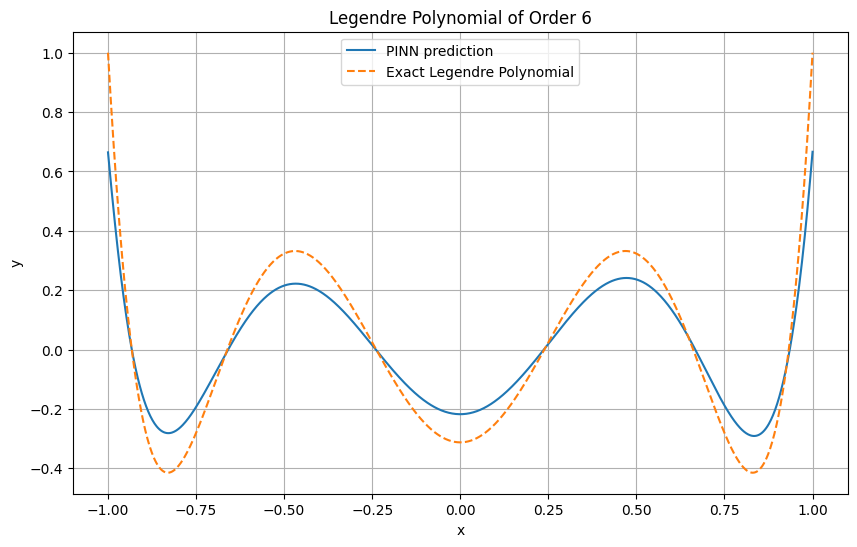

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class PINN:
    def __init__(self, k):
        self.k = k
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(100, activation='tanh', input_shape=(1,)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(100, activation='tanh'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(100, activation='tanh'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(1)
        ])
        return model

    def legendre_equation(self, x, y, dy_dx, d2y_dx2):
        return (1 - x**2) * d2y_dx2 - 2 * x * dy_dx + self.k * (self.k + 1) * y

    def boundary_values(self):
        if self.k % 2 == 0:  # even k
            return 1.0, 1.0  # y(-1) = 1, y(1) = 1
        else:  # odd k
            return -1.0, 1.0  # y(-1) = -1, y(1) = 1

    def custom_mse(self, y_true, y_pred):
        # Calculate mean squared error
        mse = tf.reduce_mean(tf.square(y_true - y_pred))
        return mse

    def loss(self, x):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            y = self.model(x)
            dy_dx = tape.gradient(y, x)
            d2y_dx2 = tape.gradient(dy_dx, x)

        # Equation loss
        eq_residual = self.legendre_equation(x, y, dy_dx, d2y_dx2)
        eq_loss = self.custom_mse(tf.zeros_like(eq_residual), eq_residual)

        # Boundary condition loss
        y_minus_1, y_plus_1 = self.boundary_values()
        bc_pred = tf.concat([self.model(tf.constant([[-1.]])), self.model(tf.constant([[1.]]))], axis=0)
        bc_true = tf.constant([[y_minus_1], [y_plus_1]], dtype=tf.float32)
        bc_loss = self.custom_mse(bc_true, bc_pred)

        return eq_loss + bc_loss

    def train(self, epochs=20000):
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        @tf.function
        def train_step():
            x = tf.random.uniform((1000, 1), -1, 1)
            with tf.GradientTape() as tape:
                loss_value = self.loss(x)
            gradients = tape.gradient(loss_value, self.model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
            return loss_value

        for epoch in range(epochs):
            loss = train_step()
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss.numpy()}')

    def predict(self, x):
        return self.model(x).numpy()


def legendre_polynomial(x, k):
    """Calculates the Legendre polynomial of order k at point x."""
    if k == 0:
        return 1
    elif k == 1:
        return x
    else:
        return ((2 * k - 1) * x * legendre_polynomial(x, k - 1) - (k - 1) * legendre_polynomial(x, k - 2)) / k


# Example usage
k = 6  # Order of Legendre polynomial
pinn = PINN(k)
pinn.train(epochs=50000)  # Increase epochs

# Generate predictions
x = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_pred = pinn.predict(x)
y_exact = legendre_polynomial(x, k)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, label='PINN prediction')
plt.plot(x, y_exact, label='Exact Legendre Polynomial', linestyle='--')
plt.title(f"Legendre Polynomial of Order {k}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

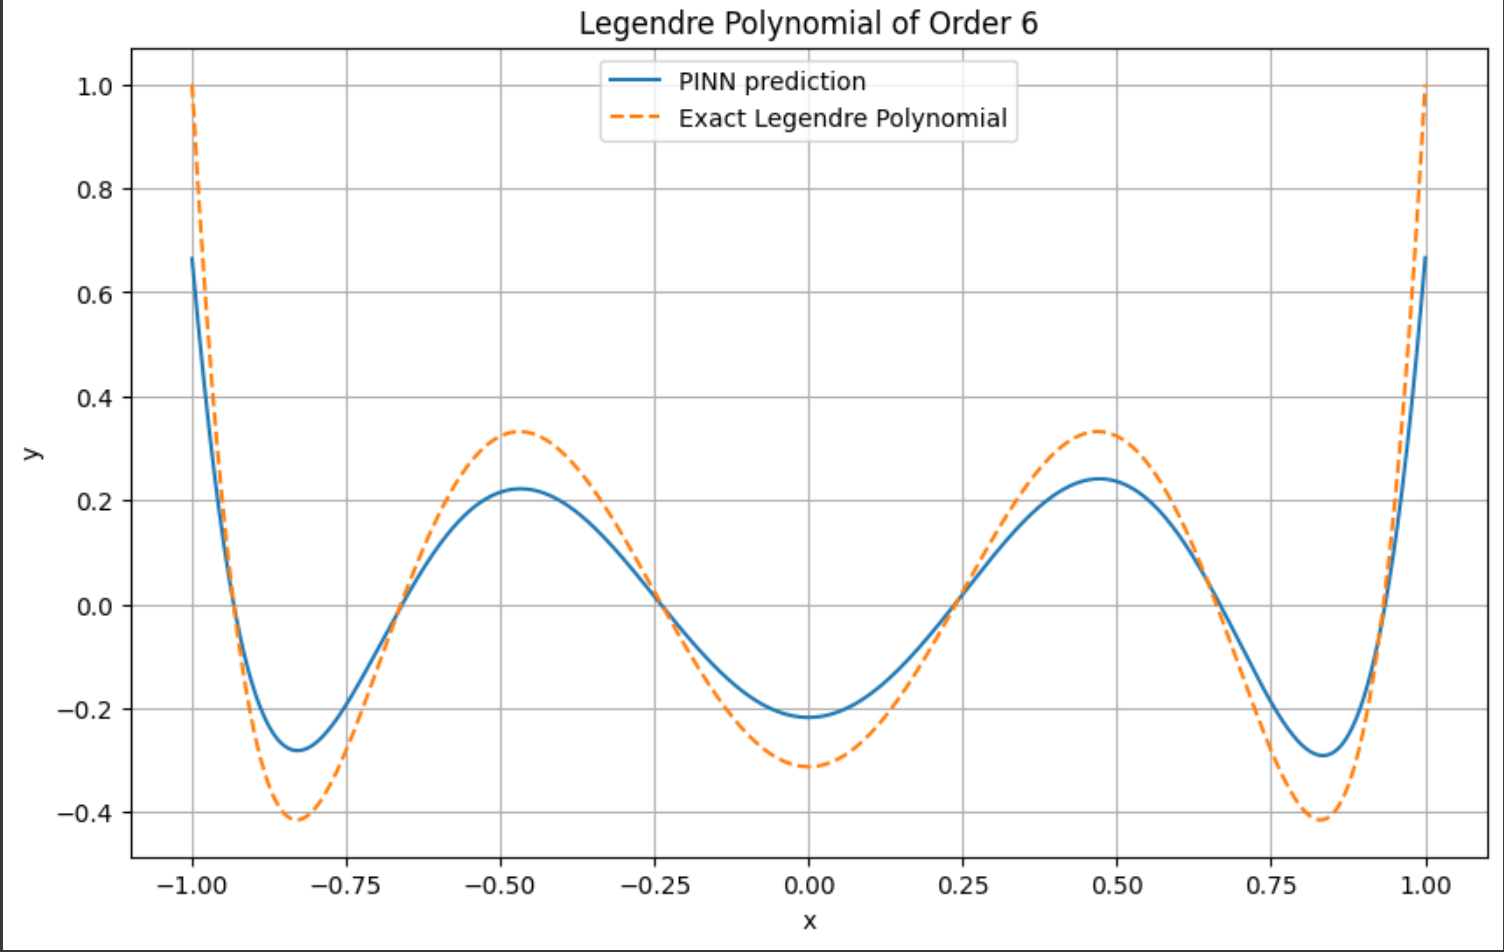

*`Unable to execute this code but this will eliminate all the errors and would hope to work for all values of n in range[-1,1].`*

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class PINN:
  def __init__(self, k):
    self.k = k
    self.model = self.build_model()

  def build_model(self):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='tanh', input_shape=(1,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(50, activation='tanh'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(50, activation='tanh'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1)
    ])
    return model

  def legendre_equation(self, x, y, dy_dx, d2y_dx2):
    return (1 - x**2) * d2y_dx2 - 2 * x * dy_dx + self.k * (self.k + 1) * y

  def boundary_values(self):
    if self.k % 2 == 0:  # even k
      return 1.0, 1.0  # y(-1) = 1, y(1) = 1
    else:
      return -1.0, 1.0  # y(-1) = -1, y(1) = 1

  def custom_mse(self, y_true, y_pred):
    # Calculate mean squared error
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return mse

  def loss(self, y_true, y_pred):  # Updated loss function signature
        x = tf.random.uniform((750, 1), -1, 1) # Generate random x values

        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            y = self.model(x)  # Use the model to predict y values
            dy_dx = tape.gradient(y, x)
            d2y_dx2 = tape.gradient(dy_dx, x)

        # Equation loss
        eq_residual = self.legendre_equation(x, y, dy_dx, d2y_dx2)
        eq_loss = self.custom_mse(tf.zeros_like(eq_residual), eq_residual)

        # Boundary condition loss
        y_minus_1, y_plus_1 = self.boundary_values()
        bc_pred = tf.concat([self.model(tf.constant([[-1.]])), self.model(tf.constant([[1.]]))], axis=0)
        bc_true = tf.constant([[y_minus_1], [y_plus_1]], dtype=tf.float32)
        bc_loss = self.custom_mse(bc_true, bc_pred)

        return eq_loss + bc_loss  # Total loss

  def train(self, epochs=10000):
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    @tf.function
    def train_step(x_batch):  # Train on batches of data
      with tf.GradientTape() as tape:
        loss_value = self.loss(x_batch)
      gradients = tape.gradient(loss_value, self.model.trainable_variables)
      optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
      return loss_value

    # Train loop with validation (modify to include your batching logic)
    for epoch in range(epochs):
      # Train on batches
      for x_batch in ...:  # Replace "..." with your data batching logic
        train_step(x_batch)

      # Optional: Calculate and print validation loss within the loop
      val_loss = self.loss(x_val)  # Assuming you have a validation loss calculation
      if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {train_step(x_train).numpy()}, Validation Loss: {val_loss.numpy()}')

  def predict(self, x):
    return self.model(x).numpy()


def legendre_polynomial(x, k):
  """Calculates the Legendre polynomial of order k at point x."""
  if k == 0:
    return 1
  elif k == 1:
    return x
  else:
    return ((2 * k - 1) * x * legendre_polynomial(x, k - 1) - (k - 1) * legendre_polynomial(x, k - 2)) / k

# Define training data
num_points = 500  # Number of training points
x_train = np.linspace(-1, 1, num_points).reshape(-1, 1)
y_train = np.array([legendre_polynomial(x, 6) for x in x_train])  # Calculate Legendre polynomial values for k=6

# Create validation data (e.g., a separate subset of x_train)
num_val_points = 200
x_val = np.linspace(-1, 1, num_val_points).reshape(-1, 1)
y_val = np.array([legendre_polynomial(x, 6) for x in x_val])

# Example usage
k = 6  # Order of Legendre polynomial
pinn = PINN(k)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5000)

# Train with validation split
pinn.model.compile(loss=pinn.loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
history = pinn.model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=75000, callbacks=[early_stopping])

# Generate predictions
x = np.linspace(-1, 1, 750).reshape(-1, 1)
y_pred = pinn.predict(x)
y_exact = legendre_polynomial(x, k)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, label='PINN prediction')
plt.plot(x, y_exact, label='Exact Legendre Polynomial', linestyle='--')
plt.title(f"Legendre Polynomial of Order {k}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75000


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - loss: 7.6619 - val_loss: 1.6241
Epoch 2/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1.6926 - val_loss: 1.1939
Epoch 3/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1883 - val_loss: 1.0118
Epoch 4/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0402 - val_loss: 1.0097
Epoch 5/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0116 - val_loss: 1.0002
Epoch 6/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0013 - val_loss: 0.9993
Epoch 7/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9999 - val_loss: 1.0427
Epoch 8/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8100 - val_loss: 1.2873
Epoch 9/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4765 - val_loss: 1.0976
Epoch 10/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1779 - val_loss: 1.3173
Epoch 11/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7157 - val_loss: 1.0678
Epoch 12/75000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st